<a href="https://colab.research.google.com/github/himanshushakyawar/Python_AI_ML_NIT/blob/main/Multi_Collinearity_Linear_Regression_Model_InDepth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

In [ ]:
!wget "https://www.dropbox.com/s/3yqg0fzr4lhlnnj/IPL-IMB381IPL2013.csv"

--2021-12-18 14:48:41--  https://www.dropbox.com/s/3yqg0fzr4lhlnnj/IPL-IMB381IPL2013.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3yqg0fzr4lhlnnj/IPL-IMB381IPL2013.csv [following]
--2021-12-18 14:48:41--  https://www.dropbox.com/s/raw/3yqg0fzr4lhlnnj/IPL-IMB381IPL2013.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdcc02ce83dfd4f87a74e0b5738.dl.dropboxusercontent.com/cd/0/inline/BcHMnS425zI8FSxGCc0STJxkMGzypXeZsUovLUjjQXzfG94JL9Hh0pWydQGfPOzqv9LMioZBGxym5xUKRxymG88bRmszwPIuhiVzDcG4VdxjDqGRtwsqAlW2guRv2uZWZCLqU1IZWXZjs5gZiZGLeYAb/file# [following]
--2021-12-18 14:48:42--  https://ucdcc02ce83dfd4f87a74e0b5738.dl.dropboxusercontent.com/cd/0/inline/BcHMnS425zI8FSxGCc0STJxkMGzypXeZsUovLUjjQXzfG94JL9Hh0pWydQGfP

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("IPL-IMB381IPL2013.csv")
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [ ]:
#Predicting Sold Price of Players

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [ ]:
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [ ]:
df["AGE"].unique()

array([2, 1, 3])

In [ ]:
df.head()

In [ ]:
features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 
'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 
'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 
'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 
'AVE-BL', 'ECON', 'SR-BL'] 

In [ ]:
df[features]

,AGE,COUNTRY,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL
0,2,SA,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93
1,2,BAN,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00
2,2,IND,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90
3,1,IND,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14
4,2,IND,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2,IND,Batsman,0,0,0,0.00,0,0.0,0,49,16,9.80,125.64,2,0,0,0.00,0.00,0.00
126,2,PAK,Batsman,6398,7,6814,75.78,3,86.6,1,3,3,3.00,42.85,0,0,0,0.00,0.00,0.00
127,2,IND,Batsman,1775,9,8051,87.58,109,44.3,1,1237,66,26.32,131.88,67,569,23,24.74,7.02,21.13
128,2,IND,Bowler,1114,288,790,73.55,278,35.4,0,99,23,9.90,91.67,1,1783,65,27.43,7.75,21.26


In [ ]:
#Analyzing Categorical data
df["PLAYING ROLE"].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [ ]:
df[features].head()

,AGE,COUNTRY,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL
0,2,SA,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93
1,2,BAN,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00
2,2,IND,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90
3,1,IND,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14
4,2,IND,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00


In [ ]:
pd.get_dummies(df["PLAYING ROLE"])

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
125,0,1,0,0
126,0,1,0,0
127,0,1,0,0
128,0,0,1,0


In [ ]:
pd.get_dummies(df["PLAYING ROLE"],drop_first=True)

,Batsman,Bowler,W. Keeper
0,0,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
125,1,0,0
126,1,0,0
127,1,0,0
128,0,1,0


In [ ]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [ ]:
ipl_auction_encoded_df = pd.get_dummies(  df[features],columns = categorical_features, drop_first = True )  # Drop_frist = True to avoid Multicollinearity

In [ ]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [ ]:
ipl_auction_encoded_df.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,AGE_3,COUNTRY_BAN,COUNTRY_ENG,COUNTRY_IND,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
features = ipl_auction_encoded_df.columns

In [ ]:
ipl_auction_encoded_df.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,AGE_3,COUNTRY_BAN,COUNTRY_ENG,COUNTRY_IND,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
X = ipl_auction_encoded_df
y = df["SOLD PRICE"]

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X , y,train_size = 0.8, random_state = 42 ) 

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(train_X,train_y)

LinearRegression()

In [ ]:
train_X.shape

(104, 31)

In [ ]:
lr.coef_.shape

(31,)

In [ ]:
lr.intercept_

375827.1990590454

In [ ]:
lr.coef_,lr.intercept_

(array([-5.37890300e+01, -1.32596723e+02,  5.79599560e+01, -5.24144970e+02,
         8.15394424e+02, -7.73309199e+02,  1.14720547e+02, -5.51633540e+03,
         2.15602760e+04, -1.32472178e+03,  4.26410011e+03,  6.98250199e+01,
         3.07524219e+03,  5.18293349e+03, -6.82077806e+03, -7.65880936e+03,
        -2.30767646e+05, -2.16827081e+05, -1.22103520e+05,  6.72410765e+05,
         1.55306401e+05,  1.94218912e+05,  7.59217670e+04,  6.42833894e+04,
         1.73601530e+04,  1.06077792e+04, -1.45494479e+05,  7.57247643e+04,
         1.53958752e+04, -7.13586280e+04,  1.64113397e+05]), 375827.1990590454)

In [ ]:
lr.predict(train_X)

In [ ]:
lr.score(train_X,train_y)

0.5538424305356855

In [ ]:
lr.score(test_X,test_y)

0.3191598450075722

## Multi-Collinearity

In [ ]:
features

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def get_vif_factors( X ):
  X_matrix = X.values
  vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ] 
  vif_factors = pd.DataFrame() 
  vif_factors['column'] = X.columns 
  vif_factors['vif'] = vif 
  return vif_factors

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
vif_factors = get_vif_factors( X[features] ) 
vif_factors

,column,vif
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


# Common Practice for Handling

VIF value greater than 4 requires further investigation to assess the impact of Multi-collinearity

- Remove one of the Variables

In [ ]:
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

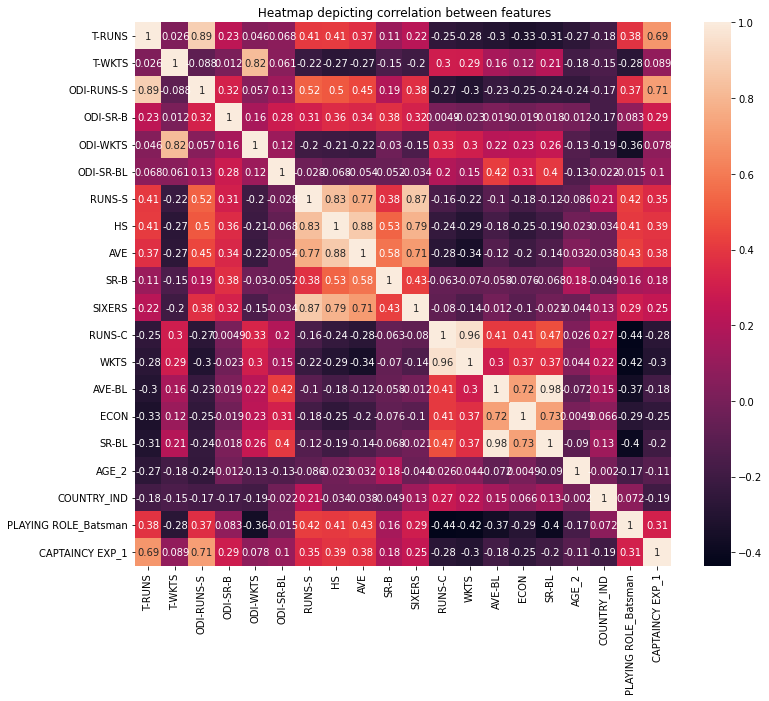

In [ ]:
plt.figure( figsize = (12,10) ) 
sns.heatmap( X[columns_with_large_vif].corr(), annot = True ) 
plt.title( " Heatmap depicting correlation between features")
plt.show()

## Observations:     
- T-RUNS & ODI-RUNS-S are highly correlated, similarly, ODI-WKTS & T-WKTS
- Batsman features like RUNS-S, HS, AVE, SIXERS are highly correlated, same applies to bowler's features like - AVE-BL, ECON & SR-BL
- Keep one column from each group (removing depends on data & domain)

In [ ]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 
                        'AVE', 'RUNS-C', 'SR-B', 'AVE-BL', 
                        'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL'] 

In [ ]:
X_new_features = X.drop(columns=columns_to_be_removed).columns

In [ ]:
# X_new_features = set(X.columns) - set(columns_to_be_removed)

In [ ]:
X_new_features

Index(['ODI-WKTS', 'ODI-SR-BL', 'SIXERS', 'WKTS', 'AGE_3', 'COUNTRY_BAN',
       'COUNTRY_ENG', 'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA',
       'COUNTRY_SL', 'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [ ]:
X[X_new_features]

,ODI-WKTS,ODI-SR-BL,SIXERS,WKTS,AGE_3,COUNTRY_BAN,COUNTRY_ENG,COUNTRY_IND,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0.0,0,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,185,37.6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,288,32.9,5,29,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,51,36.8,0,49,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0.0,28,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0.0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
126,3,86.6,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
127,109,44.3,67,23,0,0,0,1,0,0,0,0,0,0,1,0,0,1
128,278,35.4,1,65,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
get_vif_factors( X[X_new_features]) 

,column,vif
0,ODI-WKTS,2.742889
1,ODI-SR-BL,2.822148
2,SIXERS,2.397409
3,WKTS,2.883101
4,AGE_3,1.779861
5,COUNTRY_BAN,1.094293
6,COUNTRY_ENG,1.131869
7,COUNTRY_IND,3.144668
8,COUNTRY_NZ,1.173418
9,COUNTRY_PAK,1.334773


In [ ]:
train_X.shape

(104, 31)

In [ ]:
train_X = train_X[X_new_features]
lr.fit(train_X,train_y)

LinearRegression()

In [ ]:
train_X.shape

(104, 18)

In [ ]:
train_y.shape

(104,)

In [ ]:
lr.score(train_X,train_y)

0.4276491454845168

In [ ]:
lr.score(test_X[X_new_features],test_y)

0.5150782832594865

# L1 Regularization - (Lasso Regression)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(train_X,train_y)

Lasso(alpha=0.01)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
def get_train_test_rmse(model):
  y_pred_train = model.predict(train_X)
  rmse_train = np.sqrt(mean_squared_error(train_y, y_pred_train))
  r2_train = model.score(train_X,train_y)

  y_pred_test = model.predict(test_X[X_new_features])
  rmse_test =  np.sqrt(mean_squared_error(test_y, y_pred_test))
  r2_test = model.score(test_X[X_new_features],test_y)
  print(f"RMSE : train: {rmse_train}, and test: {rmse_test}")
  print(f"R2 Score: train: {r2_train}, and test: {r2_test}")

In [ ]:
get_train_test_rmse(lasso)

RMSE : train: 313038.82250215916, and test: 257000.17733309057
R2 Score: train: 0.42764914548430055, and test: 0.5150780818149743


## L2 Regularization / Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(train_X,train_y)

Ridge(alpha=1)

In [ ]:
get_train_test_rmse(ridge)

RMSE : train: 314433.2293192792, and test: 260679.48657558224
R2 Score: train: 0.4225388052309711, and test: 0.5010940512451263


# Elasticnet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=1,l1_ratio = 0.01)
enet.fit(train_X,train_y)
get_train_test_rmse(enet)

RMSE : train: 350741.59491761046, and test: 312283.3001538812
R2 Score: train: 0.281477325159159, and test: 0.2840173656347612
